In [19]:
import pandas as pd
import plotly.plotly as py

import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [8]:
users = pd.read_csv("users_scifi_location.csv")
users.head()

,Unnamed: 0,Unnamed: 0.1,AboutMe,AccountId,CreationDate,DisplayName,DownVotes,Id,LastAccessDate,Location,ProfileImageUrl,Reputation,UpVotes,Views,WebsiteUrl,lat,lon,country,city
0,0,0,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",-1.0,2011-01-11T19:19:36.483,Community,15607,-1,2011-01-11T19:19:36.483,on the server farm,NaN,1,22476,0,http://meta.stackexchange.com/,45.195300,-76.149600,Canada,NaN
1,1,1,<p>Developer on the Stack Overflow team. Find...,2.0,2011-01-11T19:50:40.620,Geoff Dalgas,0,2,2017-10-18T04:57:25.120,"Corvallis, OR",https://i.stack.imgur.com/nDllk.png,101,1,53,http://stackoverflow.com,44.639931,-123.275969,United States,Corvallis
2,2,2,<p>I am the Architecture Lead for Stack Overfl...,7598.0,2011-01-11T19:55:41.460,Nick Craver,0,3,2018-11-23T01:52:18.210,"Winston-Salem, NC",https://i.stack.imgur.com/nGCYr.jpg?s=128&g=1,101,4,29,https://nickcraver.com/blog/,36.111102,-80.200493,United States,Winston-Salem
3,3,3,"<p>co-founder of <a href=""https://airtable.com...",1998.0,2011-01-11T20:17:01.887,Emmett,0,4,2013-05-06T20:52:29.970,"San Francisco, CA",https://i.stack.imgur.com/d1oHX.jpg?s=128&g=1,101,0,26,http://minesweeperonline.com,37.784827,-122.727802,United States,San Francisco
4,4,4,"<p><a href=""http://blog.stackoverflow.com/2010...",29738.0,2011-01-11T20:18:52.493,Kevin Montrose,0,5,2018-07-11T16:01:10.277,"New York, NY, United States",NaN,101,43,28,http://kevinmontrose.com/,40.714269,-74.005973,United States,New York


# Plotly

In [64]:
with open('api_key.txt') as f:
    line = f.readline()
    api_key = line.strip()

In [11]:
countries_codes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
users = pd.merge(users, countries_codes.loc[:,["COUNTRY", "CODE"]], 
                         left_on="country", right_on="COUNTRY", how="left")
users.head()

,Unnamed: 0,Unnamed: 0.1,AboutMe,AccountId,CreationDate,DisplayName,DownVotes,Id,LastAccessDate,Location,...,Reputation,UpVotes,Views,WebsiteUrl,lat,lon,country,city,COUNTRY,CODE
0,0,0,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",-1.0,2011-01-11T19:19:36.483,Community,15607,-1,2011-01-11T19:19:36.483,on the server farm,...,1,22476,0,http://meta.stackexchange.com/,45.195300,-76.149600,Canada,NaN,Canada,CAN
1,1,1,<p>Developer on the Stack Overflow team. Find...,2.0,2011-01-11T19:50:40.620,Geoff Dalgas,0,2,2017-10-18T04:57:25.120,"Corvallis, OR",...,101,1,53,http://stackoverflow.com,44.639931,-123.275969,United States,Corvallis,United States,USA
2,2,2,<p>I am the Architecture Lead for Stack Overfl...,7598.0,2011-01-11T19:55:41.460,Nick Craver,0,3,2018-11-23T01:52:18.210,"Winston-Salem, NC",...,101,4,29,https://nickcraver.com/blog/,36.111102,-80.200493,United States,Winston-Salem,United States,USA
3,3,3,"<p>co-founder of <a href=""https://airtable.com...",1998.0,2011-01-11T20:17:01.887,Emmett,0,4,2013-05-06T20:52:29.970,"San Francisco, CA",...,101,0,26,http://minesweeperonline.com,37.784827,-122.727802,United States,San Francisco,United States,USA
4,4,4,"<p><a href=""http://blog.stackoverflow.com/2010...",29738.0,2011-01-11T20:18:52.493,Kevin Montrose,0,5,2018-07-11T16:01:10.277,"New York, NY, United States",...,101,43,28,http://kevinmontrose.com/,40.714269,-74.005973,United States,New York,United States,USA


In [14]:
users_grouped = users.groupby(["COUNTRY", "CODE"]).size().reset_index()
users_grouped.columns = ["country", "code", "count"]

In [17]:
plotly.tools.set_credentials_file(username='kaletap', api_key=api_key)

df = users_grouped

data = [ dict(
        type = 'choropleth',
        locations = df['code'],
        z = df['count'],
        text = df['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'GDP<br>Billions US$'),
      ) ]

layout = dict(
    title = 'Mapa',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

#https://plot.ly/python/choropleth-maps/

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~kaletap/0 or inside your plot.ly account where it is named 'd3-world-map'


/home/przemyslaw/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# Geopandas

In [27]:
users.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'AboutMe', 'AccountId', 'CreationDate',
       'DisplayName', 'DownVotes', 'Id', 'LastAccessDate', 'Location',
       'ProfileImageUrl', 'Reputation', 'UpVotes', 'Views', 'WebsiteUrl',
       'lat', 'lon', 'country', 'city', 'COUNTRY', 'CODE', 'Coordinates'],
      dtype='object')

In [56]:
users['Coordinates'] = list(zip(users.lon, users.lat))
users['Coordinates'] = users['Coordinates'].apply(Point) # changing coordinates to Point objects
gdf = geopandas.GeoDataFrame(users, geometry='Coordinates')

In [57]:
europe = world[world.continent == 'Europe'].name.values
europe

array(['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Bosnia and Herz.',
       'Belarus', 'Switzerland', 'Czech Rep.', 'Germany', 'Denmark',
       'Spain', 'Estonia', 'Finland', 'France', 'United Kingdom',
       'Greece', 'Croatia', 'Hungary', 'Ireland', 'Iceland', 'Italy',
       'Kosovo', 'Lithuania', 'Luxembourg', 'Latvia', 'Moldova',
       'Macedonia', 'Montenegro', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Russia', 'Serbia', 'Slovakia', 'Slovenia',
       'Sweden', 'Ukraine'], dtype=object)

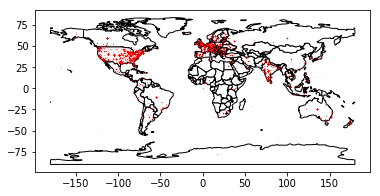

In [60]:
# Plotting

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red', markersize=0.001)

plt.show()